---

<h1><center>SDSE Homework 3 <br><br> Problem 1: Using SVD for Image Compression </center></h1>
<h3><center>By Pavan M. Reddy [worked with Joshua Duarte]</h3>

---

This problem demonstrates the use of SVD for compressing images. We will do this with a very simple and clean image of a black circle. You will use Python to load the image, run the singular value decomposition, and then create and view images with different levels of compression. Please begin by replacing `None` in the next cell with your student id number. 

In [70]:
result = {
    'SID': 3038574931 # enter your SID
}

In [71]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pickle

The next cell will load an image from a file, store it in the variable `X`, and plot it using `plt.imshow`. 

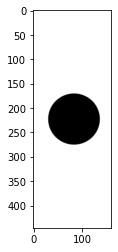

In [72]:
# Load the data from a pickle file
with open('data_circle.pickle', 'rb') as file:
    X = pickle.load(file)   
    
# Display the data matrix as an image
plt.imshow(X,cmap='gray')

# 1) Data dimensions

Record the number of rows and columns of `X` in variables `N` and `D` respectively.

In [73]:
N = X.shape[0]
D = X.shape[1]

In [74]:
################################
# Reporting. Do not modify.#####
result['N'] = N   # 1 point
result['D'] = D   # 1 point
################################

# 2) Run SVD
We are using the implementation of SVD from scipy's `linalg` package. Please refer to the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) for `linalg.svd` to understand the syntax. Apply SVD to the image `X` and record the result in matrices `U`, `s`, and `Vt`. Note the dimension of these matrices. Is this what you expected from SVD?

In [75]:
from scipy import linalg

U, s, Vt = linalg.svd(X)
U.shape, s.shape, Vt.shape

((446, 446), (160,), (160, 160))

# 3) Matrix rank
Compute the rank of X using [`np.linalg.matrix_rank`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_rank.html). Record it to the variable `rank`.

In [76]:
rank = np.linalg.matrix_rank(X)

In [77]:
################################
# Reporting. Do not modify.#####
result['rank'] = rank   # 2 points
################################

# 4) Plot the singular values
Use [`plt.semilogy`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogy.html) to plot the sequence of singular values.

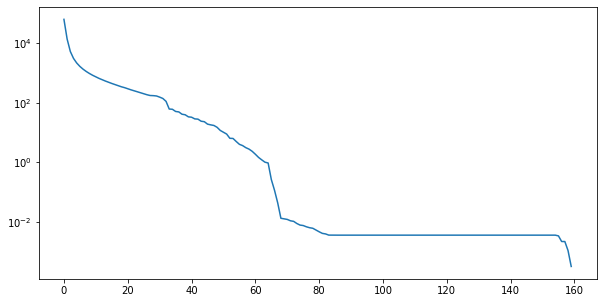

In [78]:
fig4 = plt.figure(figsize=(10,5))
plt.semilogy(s)
plt.show()

In [79]:
################################
# Reporting. Do not modify.#####
result['fig4'] = fig4   # 4 points
################################

# 5) Plot first 20 columns of $U \Sigma$ using [`plt.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

Hints: 
+1. matrix multiplication in numpy is performed with the `@` symbol or with `np.matmul`. Example:

`AtimesB = np.matmul(A,B)`

is the same as 

`AtimesB = A@B`

2. Construct the matrix $\Sigma$ by using `S = np.diag(s)`. 

3. Be aware of the dimensions of `U` and `S`, and how to select the appropriate rows/columns from those matrices. 

4. For plotting pass `aspect='auto', interpolation='none'` to `imshow`.

<Figure size 720x360 with 0 Axes>

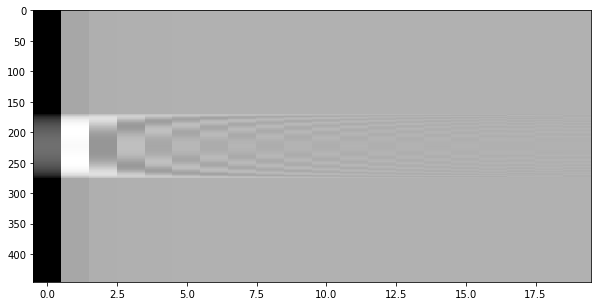

In [80]:
fig5 = plt.figure(figsize=(10,5))
rho = 20
fig5 = plt.figure(figsize=(10,5))
r = 20
S = np.diag(s)
Xapprox = U [:,:r] @ S [:r,:r]
img = plt.imshow(Xapprox, aspect='auto', interpolation='none',cmap='gray')#looks clear with 'prism' colormap
plt.show() 

In [81]:
################################
# Reporting. Do not modify.#####
result['fig5'] = fig5    # 6 points
################################

# 6) Plot the first 20 rows of $\Sigma V^T$ using `plt.imshow`

Same instructions as part 5.

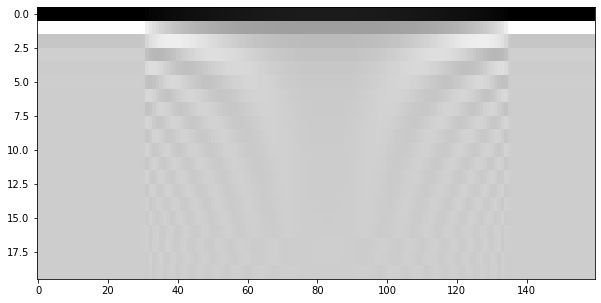

In [82]:
fig6 = plt.figure(figsize=(10,5))
rho =20
S = np.diag(s)
Xapproxs = S [:r,:r] @ Vt [:r,:]
img = plt.imshow(Xapproxs, aspect='auto', interpolation='none',cmap='gray')#looks clear with 'prism' colormap
plt.show()

In [83]:
################################
# Reporting. Do not modify.#####
result['fig6'] = fig6    # 6 points
################################

# 7) Plot the compressed images for $\rho=2$, $\rho=5$, $\rho=50$

Plot each one with `ax[i].imshow` with `i` varying from 0 to 2, so that the images appear in a row.

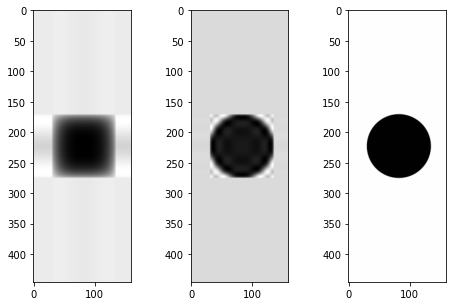

In [84]:
fig7, ax = plt.subplots(figsize=(8,5),nrows=1,ncols=3)
rho=[2,5,50]
for i in range (len(rho)):
    xcompressed = U [:,:rho[i]] @ S [:rho[i],:rho[i]] @ Vt [:rho[i],:]
    ax[i].imshow(xcompressed,cmap='gray')#looks clear with 'prism' colormap
plt.show()

In [85]:
################################
# Reporting. Do not modify.#####
result['fig7'] = fig7    # 6 points
################################

# 8) Plot the sum of the first $\rho$ singular values as a function of $\rho$

Hint: [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)

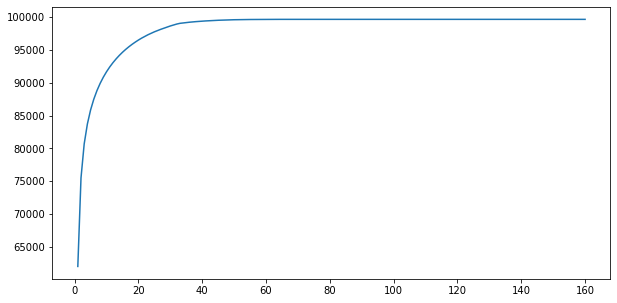

In [86]:
fig8 = plt.figure(figsize=(10,5))
rplot = s.shape [0]
rnum = np.linspace (1,160,160)
cumr = np.cumsum(s)
plt.plot(rnum, cumr)
plt.show()

In [87]:
################################
# Reporting. Do not modify.#####
result['fig8'] = fig8    # 6 points
################################

# 9) How many columns should be kept to preserve 90% of the total sum of singular values?
Record your answer as `cols90`

In [88]:
cols90 = list(cumr<0.9*cumr[-1]).index(False) + 1

In [92]:
################################
# Reporting. Do not modify.#####
result['cols90'] = cols90  # 4 points
################################

---
## Do not modify below this

In [91]:
with open('hw3_prob1_{}.pickle'.format(result['SID']),'wb') as file:
    pickle.dump(result,file)